In [2]:
import pandas as pd

In [120]:
InstagramDF=pd.read_csv('InstagramDatasetAddedFeaturesVersion3.csv', encoding='utf-8-sig')

In [121]:
InstagramDF['mean_likes'] = InstagramDF['edge_liked_by'].groupby(InstagramDF['id']).transform('mean')
InstagramDF['mean_comments'] = InstagramDF['edge_media_to_comment'].groupby(InstagramDF['id']).transform('mean')

In [146]:
InstagramDF.to_csv('InstagramDatasetFinal.csv', encoding='utf-8-sig', index=False)

In [122]:
toDrop = ['biography', 'business_category_name', 'connected_fb_page', 'country_block', 'edge_media_collections', 'edge_saved_media', 'external_url', 'external_url_linkshimmed', 'full_name', 'has_channel', 'id', 'is_joined_recently', 'is_private', 'profile_pic_url', 'profile_pic_url_hd', 'username', 'accessibility_caption', 'display_url', 'edge_media_preview_like', 'edge_media_to_caption', 'location', 'taken_at_timestamp', 'hashtags', 'mentions', 'day', 'HourBin']
Regression_Data = InstagramDF.drop(toDrop,axis=1)
Regression_Data["time_between"].fillna(0, inplace=True)
y=Regression_Data["number_of_likes/mean"]

In [123]:
Regression_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20778 entries, 0 to 20777
Data columns (total 50 columns):
edge_felix_video_timeline                      20778 non-null int64
edge_follow                                    20778 non-null int64
edge_followed_by                               20778 non-null int64
edge_owner_to_timeline_media                   20778 non-null int64
highlight_reel_count                           20778 non-null int64
is_business_account                            20778 non-null bool
is_verified                                    20778 non-null bool
comments_disabled                              20778 non-null bool
edge_liked_by                                  20778 non-null int64
edge_media_to_comment                          20778 non-null int64
is_video                                       20778 non-null bool
time_between                                   20778 non-null float64
number_of_likes/mean                           20778 non-null float64
number_

In [75]:
import numpy as np
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import xgboost as xgb

In [76]:
correlation = Regression_Data.corr(method='pearson')
columns = correlation.nlargest(10, 'number_of_likes/mean').index
columns

Index(['number_of_likes/mean', 'number_of_likes-median', 'edge_liked_by',
       'edge_media_to_comment', 'Saturday', 'hr_cos', 'Sunday', 'time_between',
       '(16, 20]', 'hour_of_day'],
      dtype='object')

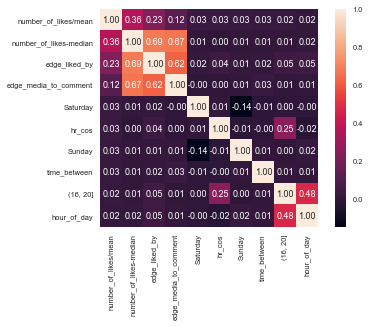

In [80]:
correlation_map = np.corrcoef(Regression_Data[columns].values.T)
sns.set(font_scale=0.75)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [81]:
print(Regression_Data.describe())

       edge_felix_video_timeline   edge_follow  edge_followed_by  \
count               20778.000000  20778.000000      2.077800e+04   
mean                    3.729714    596.863606      8.380156e+06   
std                    16.687517    783.022966      1.608630e+07   
min                     0.000000      0.000000      8.000000e+00   
25%                     0.000000    141.000000      5.084570e+05   
50%                     0.000000    383.000000      4.181985e+06   
75%                     3.000000    770.000000      1.024219e+07   
max                   568.000000   7246.000000      2.940083e+08   

       edge_owner_to_timeline_media  highlight_reel_count  edge_liked_by  \
count                  20778.000000          20778.000000   2.077800e+04   
mean                    2407.458466              9.011888   2.973237e+05   
std                     3280.928363             21.556172   6.648774e+05   
min                        2.000000              0.000000   0.000000e+00   
25%    

In [82]:
X = Regression_Data
Y = X['number_of_likes/mean'].values
X = X.drop('number_of_likes/mean', axis = 1).values

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm

In [88]:
import warnings
warnings.filterwarnings('ignore')
all_regressors = []
all_regressors.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
all_regressors.append(('LASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
all_regressors.append(('EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
all_regressors.append(('Ridge', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge())])))
all_regressors.append(('BYR', Pipeline([('Scaler', StandardScaler()),('BYR', BayesianRidge())])))
all_regressors.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
all_regressors.append(('CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
all_regressors.append(('GBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
all_regressors.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', svm.SVR())])))
all_regressors.append(('XGB', Pipeline([('Scaler', StandardScaler()),('XGB', xgb.XGBRegressor())])))

train_error = []
test_error = []
for name, model in all_regressors:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results_train = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='mean_squared_error')
    cv_results_test = cross_val_score(model, X_test, Y_test, cv=kfold, scoring='mean_squared_error')
    train_error.append(cv_results_train.mean())
    test_error.append(cv_results_test.mean())

In [90]:
col={'Train Error':train_error,'Test Error':test_error}
models=['Linear Regression', 'Lasso Regression', 'ElasticNet', 'Ridge Regression', 'Bayesian Regression','KNN','Decision Tree', 'Gradient Boosting','SVM', 'XGBoost']
df=pd.DataFrame(data=col,index=models)
df

,Test Error,Train Error
Linear Regression,-0.183187,-0.281757
Lasso Regression,-0.238635,-0.262383
ElasticNet,-0.238635,-0.262383
Ridge Regression,-0.183183,-0.281632
Bayesian Regression,-0.182879,-0.280375
KNN,-0.209892,-0.228720
Decision Tree,-0.063286,-0.056451
Gradient Boosting,-0.050156,-0.055103
SVM,-0.142178,-0.150914
XGBoost,-0.050635,-0.054867


In [124]:
toDropVersion2 = ['edge_liked_by', 'edge_media_to_comment', 'number_of_likes-median']
Regression_Data2 = Regression_Data.drop(toDropVersion2,axis=1)

In [125]:
Regression_Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20778 entries, 0 to 20777
Data columns (total 47 columns):
edge_felix_video_timeline                      20778 non-null int64
edge_follow                                    20778 non-null int64
edge_followed_by                               20778 non-null int64
edge_owner_to_timeline_media                   20778 non-null int64
highlight_reel_count                           20778 non-null int64
is_business_account                            20778 non-null bool
is_verified                                    20778 non-null bool
comments_disabled                              20778 non-null bool
is_video                                       20778 non-null bool
time_between                                   20778 non-null float64
number_of_likes/mean                           20778 non-null float64
Friday                                         20778 non-null int64
Monday                                         20778 non-null int64
Saturda

In [140]:
X_2 = Regression_Data
Y_2 = X_2['number_of_likes/mean'].values
y_2a = Regression_Data['number_of_likes/mean']
X_2 = X_2.drop('number_of_likes/mean', axis = 1).values

In [127]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split (X_2, Y_2, test_size = 0.20, random_state=42)

In [131]:
all_regressors = []
all_regressors.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
all_regressors.append(('LASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
all_regressors.append(('EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
all_regressors.append(('Ridge', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge())])))
all_regressors.append(('BYR', Pipeline([('Scaler', StandardScaler()),('BYR', BayesianRidge())])))
all_regressors.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
all_regressors.append(('CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
all_regressors.append(('GBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
all_regressors.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', svm.SVR())])))
all_regressors.append(('XGB', Pipeline([('Scaler', StandardScaler()),('XGB', xgb.XGBRegressor())])))

train_error = []
test_error = []
train_error2 = []
test_error2 = []
for name, model in all_regressors:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results_train = cross_val_score(model, X_train2, Y_train2, cv=kfold, scoring='mean_squared_error')
    cv_results_test = cross_val_score(model, X_test2, Y_test2, cv=kfold, scoring='mean_squared_error')
    cv_results_train2 = cross_val_score(model, X_train2, Y_train2, cv=kfold, scoring='r2')
    cv_results_test2 = cross_val_score(model, X_test2, Y_test2, cv=kfold, scoring='r2')
    train_error.append(cv_results_train.mean())
    test_error.append(cv_results_test.mean())
    train_error2.append(cv_results_train2.mean())
    test_error2.append(cv_results_test2.mean())

In [132]:
col={'Train Error MSE':train_error,'Test Error MSE':test_error, 'Train Error R^2':train_error2,'Test Error R^2':test_error2}
models=['Linear Regression', 'Lasso Regression', 'ElasticNet', 'Ridge Regression', 'Bayesian Regression','KNN','Decision Tree', 'Gradient Boosting','SVM', 'XGBoost']
df=pd.DataFrame(data=col,index=models)
df

,Test Error MSE,Test Error R^2,Train Error MSE,Train Error R^2
Linear Regression,-0.180648,0.241348,-0.277374,-0.069042
Lasso Regression,-0.238635,-0.003557,-0.262383,-0.000625
ElasticNet,-0.238635,-0.003557,-0.262383,-0.000625
Ridge Regression,-0.180591,0.241614,-0.276585,-0.065819
Bayesian Regression,-0.181474,0.238270,-0.276812,-0.066749
KNN,-0.209238,0.120198,-0.226082,0.138012
Decision Tree,-0.034848,0.859633,-0.019218,0.926914
Gradient Boosting,-0.027898,0.884246,-0.027662,0.894823
SVM,-0.135180,0.435608,-0.137770,0.474954
XGBoost,-0.028206,0.883092,-0.028960,0.889762


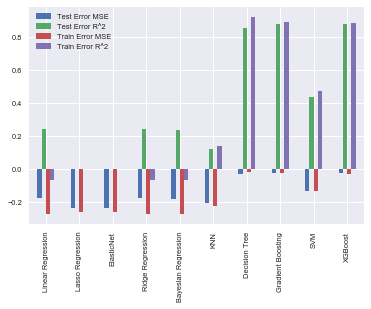

In [133]:
df.plot(kind='bar')

In [145]:
model = xgb.XGBRegressor()
model.fit(X_train2,Y_train2)
predictions = model.predict(X_test2)
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test2})
compare.head(10)

,Prediction,Test Data
0,1.154562,1.097305
1,0.679439,0.499679
2,0.677705,0.515167
3,0.873825,0.969628
4,1.084017,0.997958
5,1.302128,1.254182
6,0.491697,0.501491
7,0.918719,1.003219
8,1.129533,0.725389
9,0.806970,0.819999


In [147]:
Regression_Data.to_csv('InstagramDatasetRegression.csv', encoding='utf-8-sig', index=False)